# OPTIONAL Workbook for Homework #8

You are welcome to work on a local version of a notebook and upload it for this assignment.

This workspace is here if you'd rather not have to install all necessary packages locally.

You can download any json files to your local computer to add them to your jekyll page.

To download, you can right-click on the file and hit download.  For example, with the following code:

```python
from vega_datasets import data
import altair as alt

source = data.cars()
source.rename(columns={"Miles_per_Gallon":"Miles per Gallon"}, 
              inplace=True)


chart = alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles per Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles per Gallon']
).interactive()

chart.properties(width='container').save("cars.json")
```

You can download from the side bar like this:

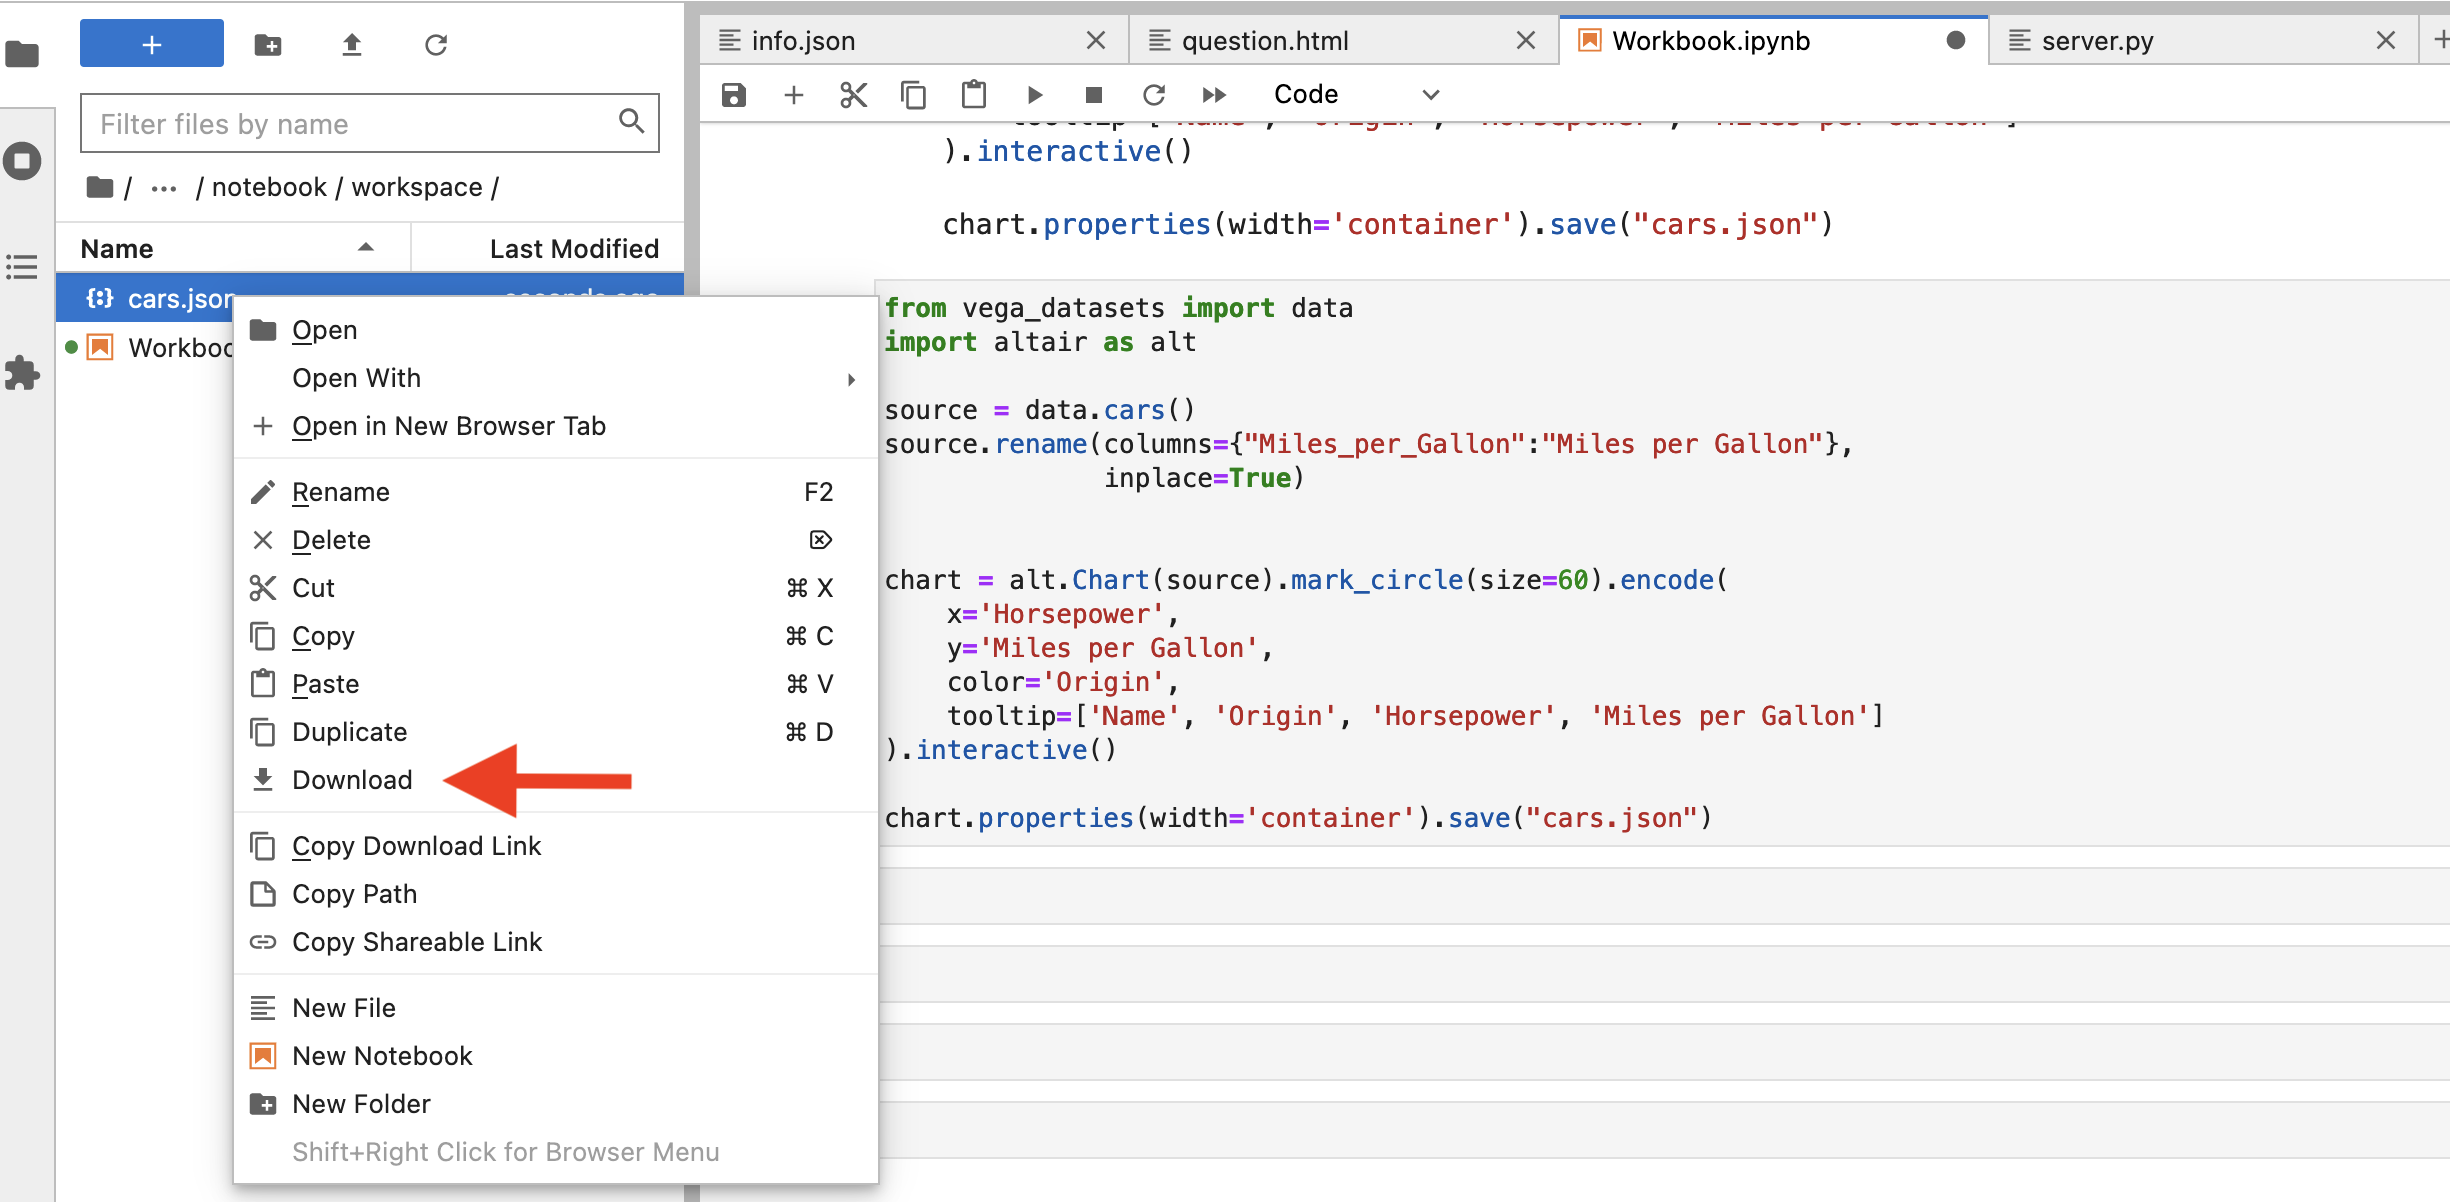

In [9]:
import pandas as pd
import altair as alt

# Load data
df = pd.read_csv("building_inventory.csv")

# Data transformation
map_data = df.dropna(subset=['Square Footage', 'City', 'Bldg Status']).groupby(['City', 'Bldg Status']).agg(
    Total_Square_Footage=('Square Footage', 'sum')
).reset_index()

# Interactive map
map_chart = alt.Chart(map_data).mark_circle().encode(
    longitude=alt.Longitude('Longitude:Q'),
    latitude=alt.Latitude('Latitude:Q'),
    size=alt.Size('Total_Square_Footage:Q', title='Square Footage'),
    color=alt.Color('Bldg Status:N', title='Building Status'),
    tooltip=['City', 'Total_Square_Footage', 'Bldg Status']
).properties(
    width=800,
    height=500,
    title="Building Distribution in Illinois"
).interactive()

map_chart



alt.Chart(...)

In [7]:
import pandas as pd
import altair as alt

# Load data
df = pd.read_csv("building_inventory.csv")

# Data transformation
bar_data = df.dropna(subset=['Square Footage', 'Year Acquired']).groupby(['Bldg Status', 'Year Acquired']).agg(
    Total_Square_Footage=('Square Footage', 'sum')
).reset_index()

# Interactive elements
status_dropdown = alt.binding_select(options=bar_data['Bldg Status'].unique(), name="Building Status: ")
status_selection = alt.selection_point(fields=['Bldg Status'], bind=status_dropdown)

year_slider = alt.binding_range(min=bar_data['Year Acquired'].min(), max=bar_data['Year Acquired'].max(), name="Year: ")
year_selection = alt.selection_point(fields=['Year Acquired'], bind=year_slider)

# Bar chart
bar_chart = alt.Chart(bar_data).mark_bar().encode(
    x=alt.X('Year Acquired:Q', title='Year Acquired'),
    y=alt.Y('Total_Square_Footage:Q', title='Total Square Footage'),
    color=alt.Color('Bldg Status:N', title='Building Status'),
    tooltip=['Year Acquired', 'Total_Square_Footage', 'Bldg Status']
).add_params(
    status_selection,
    year_selection
).transform_filter(
    status_selection
).transform_filter(
    year_selection
).properties(
    width=800,
    height=400,
    title="Square Footage by Building Status Over Time"
)

# If using Jupyter Notebook, just display the chart
bar_chart


alt.Chart(...)